# Cargar librerías y paquetes

In [100]:
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import funciones as funciones

import joblib  ### para guardar modelos
import openpyxl
#import a_funciones as funciones  #en caso de usar funcion # para llamarlo en visual Studio

In [102]:
# Se carga la base de datos creada anteriormente
file_path = 'BD_fallasN.csv'

# Lee el archivo CSV especificando el códec
BD_fallas = pd.read_csv(file_path, encoding='latin1')

# Muestra las primeras filas del DataFrame
BD_fallas.head()

,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida sin desgaste en mm2 (RODILLO),Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,No conformidad,Porcentaje de no conformidad
0,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,102.0,101.0,0.980,177.8,6.0,Desgaste,0.980
1,54312,23311,890100251,1018018,"CDNA FB 864-K443-C2-P7""",4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ElongaciÃ³n,1.680
2,66729,27177,860009808,30179097,"CDNA FB-6830-K2-C2 P 6""",4500556454,EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ElongaciÃ³n,0.260
3,67135,27380,860009808,30321162D,PTNA INT ADIT 9.5X152X349,E-MAIL 02/11/2021,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,4,...,NaN,NaN,NaN,350.0,349.0,0.286,250.0,6.0,Desgaste,0.286
4,67133,27380,860009808,30321162B,PTNA CAB 9.5X78X349,E-MAIL 02/11/2021,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,350.0,349.0,0.286,250.0,6.0,Desgaste,0.286


In [103]:
BD_fallas.columns

Index(['ConsecutivoOP', 'ConsecPedido', 'Cliente', 'Producto', 'NombProducto',
       'OCCliente', 'Actividad', 'RecMAQ', 'RecHOM', 'SecAct', 'FechEstInicil',
       'estado', 'TipoConsecutivo', 'Fecha de visita', 'Empresa', 'Planta',
       'PaÃ­s', 'Ciudad', 'Tipo de equipo', 'Pedido NÃÂ°', 'Material',
       'Causa de desgaste', 'Si escogiÃ³ otros, Â¿cuÃ¡l?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena',
       'Medida referencia de control desgaste nueva en mm (CADENA)',
       'Medida referencia control de desgaste actual en mm (CADENA)',
       'Porcentaje de elongaciÃ³n actual % (CADENA)',
       'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)',
       'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)',
       'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)',
       'Porcentaje de desgaste actual % (BUJE)',
       'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)',
       'Porcentaje de des

In [104]:
# Lista de las columnas que deseas eliminar
columnas_a_eliminar = [
    'ConsecutivoOP', 'Producto','ConsecPedido', 'Cliente', 'OCCliente', 'SecAct', 'estado',
    'TipoConsecutivo', 'Pedido NÃÂ°', 'Medida referencia de control desgaste nueva en mm (CADENA)', 
    'Medida referencia control de desgaste actual en mm (CADENA)', 'Porcentaje de elongaciÃ³n actual % (CADENA)', 
    'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)', 'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)', 
    'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)', 'Porcentaje de desgaste actual % (BUJE)', 
    'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)', 
    'Porcentaje de desgaste actual % (PASADOR)', 'Medida sin desgaste en mm2 (RODILLO)', 
    'Medida actual en mm2 (RODILLO)', 'Porcentaje de desgaste actual % (RODILLO)', 
    'Altura de la platina en mm', 'Medida actual de la platina en mm (PLATINA)', 
    'Porcentaje de desgaste actual % (PLATINA)', 'Paso en mm', 'Cantidad de pasos'
]

# Generar un nuevo DataFrame eliminando las columnas especificadas
BD_fallasC = BD_fallas.drop(columns=columnas_a_eliminar)

# Verificar las primeras filas del nuevo DataFrame para asegurarte que se eliminaron correctamente
print(BD_fallasC.head())


                NombProducto Actividad  \
0        PTNA INT 16X103X301     CORT2   
1    CDNA FB 864-K443-C2-P7"      ENSA   
2   CDNA FB-6830-K2-C2 P 6"       EMPA   
3  PTNA INT ADIT 9.5X152X349      ENDE   
4        PTNA CAB 9.5X78X349     CORT2   

                                      RecMAQ              RecHOM  \
0                          OXICORTE Y PLASMA              CORTAR   
1                            PRENSA ANCLAJES             FORJADO   
2                  BANCO DE TRABAJO DESPACHO  PRODUCTO TERMINADO   
3  PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS             FORJADO   
4                          OXICORTE Y PLASMA              CORTAR   

  FechEstInicil Fecha de visita Empresa    Planta     PaÃ­s    Ciudad  \
0    2021-08-03      2022-12-05  HOLCIM     NOBSA  COLOMBIA    BOYACA   
1    2019-01-25      2022-03-15   ARGOS  SOGAMOSO  COLOMBIA  SOGAMOSO   
2    2021-10-02      2023-07-07  HOLCIM       NaN  COLOMBIA    BOYACA   
3    2021-11-04      2022-12-05  HOLCIM    BOY

In [105]:
# Observar el DF
BD_fallasC.head()

,NombProducto,Actividad,RecMAQ,RecHOM,FechEstInicil,Fecha de visita,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,2021-08-03,2022-12-05,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,2019-01-25,2022-03-15,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,2021-10-02,2023-07-07,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,NaN,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286


In [106]:
# Se verifica el tipo de variable
BD_fallasC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NombProducto                          47 non-null     object 
 1   Actividad                             47 non-null     object 
 2   RecMAQ                                47 non-null     object 
 3   RecHOM                                47 non-null     object 
 4   FechEstInicil                         47 non-null     object 
 5   Fecha de visita                       47 non-null     object 
 6   Empresa                               47 non-null     object 
 7   Planta                                46 non-null     object 
 8   PaÃ­s                                 47 non-null     object 
 9   Ciudad                                47 non-null     object 
 10  Tipo de equipo                        47 non-null     object 
 11  Material             

In [107]:
# cambio de formato de fecha

# Convertir las columnas 'FechEstInicil' y 'Fecha de visita' a formato datetime
BD_fallasC['FechEstInicil'] = pd.to_datetime(BD_fallasC['FechEstInicil'], errors='coerce')
BD_fallasC['Fecha de visita'] = pd.to_datetime(BD_fallasC['Fecha de visita'], errors='coerce')

# Crear una nueva columna 'Tiempo hasta falla' que sea la diferencia en días entre 'FechEstInicil' y 'Fecha de visita'
BD_fallasC['Tiempo hasta falla (Dias)'] = (BD_fallasC['Fecha de visita'] - BD_fallasC['FechEstInicil']).dt.days

# Verificar las primeras filas para asegurarse de que todo esté correcto
BD_fallasC.head()


,NombProducto,Actividad,RecMAQ,RecHOM,FechEstInicil,Fecha de visita,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,2021-08-03,2022-12-05,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,2019-01-25,2022-03-15,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,2021-10-02,2023-07-07,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,NaN,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,2021-11-04,2022-12-05,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [108]:
# Lista de las columnas que deseas eliminar
columnas_a_eliminar2 = [
    'FechEstInicil', 'Fecha de visita'
]

# Generar un nuevo DataFrame eliminando las columnas especificadas
BD_fallasD = BD_fallasC.drop(columns=columnas_a_eliminar2)

# Verificar las primeras filas del nuevo DataFrame para asegurarte que se eliminaron correctamente
BD_fallasD.head()


,NombProducto,Actividad,RecMAQ,RecHOM,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,NaN,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [109]:
# Verificación de nulos
print("\nNúmero de datos faltantes por columna:")
print(BD_fallasD.isnull().sum())


Número de datos faltantes por columna:
NombProducto                             0
Actividad                                0
RecMAQ                                   0
RecHOM                                   0
Empresa                                  0
Planta                                   1
PaÃ­s                                    0
Ciudad                                   0
Tipo de equipo                           0
Material                                 0
Causa de desgaste                        6
Si escogiÃ³ otros, Â¿cuÃ¡l?             11
Escoja el desgaste donde se presenta     0
Tipo de cadena                           0
Referencia cadena                        0
No conformidad                           0
Porcentaje de no conformidad             0
Tiempo hasta falla (Dias)                0
dtype: int64


In [110]:
# Rellenar los valores nulos con la cadena 'No Aplica'
BD_fallasD = BD_fallasD.fillna('No Aplica')

# Verificar las primeras filas para asegurarte que los nulos fueron reemplazados
BD_fallasD.head()

,NombProducto,Actividad,RecMAQ,RecHOM,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogiÃ³ otros, Â¿cuÃ¡l?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [111]:
# Renombrar las columnas mal escritas
BD_fallasD = BD_fallasD.rename(columns={
    'PaÃ­s': 'País',
    'Si escogiÃ³ otros, Â¿cuÃ¡l?': 'Si escogió otros, ¿cuál?'
})

# Verificar las primeras filas para asegurarte de que las columnas fueron renombradas
BD_fallasD.head()

,NombProducto,Actividad,RecMAQ,RecHOM,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ENSA,PRENSA ANCLAJES,FORJADO,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,CORT2,OXICORTE Y PLASMA,CORTAR,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [112]:
# Verificamos nulos nuevamente
print("\nNúmero de datos faltantes por columna:")
print(BD_fallasD.isnull().sum())


Número de datos faltantes por columna:
NombProducto                            0
Actividad                               0
RecMAQ                                  0
RecHOM                                  0
Empresa                                 0
Planta                                  0
País                                    0
Ciudad                                  0
Tipo de equipo                          0
Material                                0
Causa de desgaste                       0
Si escogió otros, ¿cuál?                0
Escoja el desgaste donde se presenta    0
Tipo de cadena                          0
Referencia cadena                       0
No conformidad                          0
Porcentaje de no conformidad            0
Tiempo hasta falla (Dias)               0
dtype: int64


In [113]:
# eliminar variables que no se necesitan
BD_fallasD = BD_fallasD.drop(['Actividad','RecMAQ','RecHOM'], axis=1)
BD_fallasD.head()

,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PTNA INT 16X103X301,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,"CDNA FB 864-K443-C2-P7""",ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,"CDNA FB-6830-K2-C2 P 6""",HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PTNA INT ADIT 9.5X152X349,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PTNA CAB 9.5X78X349,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [114]:
# Función personalizada para revisar y reemplazar los valores de la columna 'NombProducto'
def reemplazar_producto(nombre):
    if 'PTNA' in nombre:
        return 'PLATINA'
    elif 'BUJE' in nombre:
        return 'BUJE'
    elif 'CDNA' in nombre:
        return 'CADENA'
    elif 'PASADOR' in nombre:
        return 'PASADOR'
    elif 'RODILLO' in nombre:
        return 'RODILLO'
    else:
        return nombre  # Si no coincide con ninguna palabra, mantener el valor original

# Aplicar la función a la columna 'NombProducto'
BD_fallasD['NombProducto'] = BD_fallasD['NombProducto'].apply(reemplazar_producto)

# Verificar las primeras filas para asegurarte de que los cambios se realizaron correctamente
BD_fallasD.head()


,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,489
1,CADENA,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,ElongaciÃ³n,1.680,1145
2,CADENA,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,DesalineaciÃ³n,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,ElongaciÃ³n,0.260,643
3,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
4,PLATINA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396


In [115]:
# Se verifican valores unicos
BD_fallasD['NombProducto'].unique

<bound method Series.unique of 0     PLATINA
1      CADENA
2      CADENA
3     PLATINA
4     PLATINA
5        BUJE
6     PLATINA
7     RODILLO
8        BUJE
9      CADENA
10    PASADOR
11     CADENA
12     CADENA
13    RODILLO
14       BUJE
15     CADENA
16    PLATINA
17       BUJE
18     CADENA
19       BUJE
20    PLATINA
21       BUJE
22    PASADOR
23       BUJE
24     CADENA
25    PASADOR
26    PASADOR
27       BUJE
28       BUJE
29       BUJE
30    PLATINA
31       BUJE
32     CADENA
33       BUJE
34     CADENA
35     CADENA
36    PASADOR
37     CADENA
38     CADENA
39    PLATINA
40    PLATINA
41    PASADOR
42     CADENA
43    PASADOR
44     CADENA
45       BUJE
46     CADENA
Name: NombProducto, dtype: object>

In [116]:
# Verificación de tamaño
BD_fallasD.shape

(47, 15)

# Convertir a Dummies

In [117]:
df_dummies = BD_fallasD.copy()

In [118]:
# Identificar las columnas categóricas
cat = df_dummies.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar las categorías únicas
for column in cat:
    unique_categories = df_dummies[column].unique()
    print(f'Categorías en "{column}": {unique_categories}')

Categorías en "NombProducto": ['PLATINA' 'CADENA' 'BUJE' 'RODILLO' 'PASADOR']
Categorías en "Empresa": ['HOLCIM' 'ARGOS' 'MANUELITA' 'CEMEX' 'INGENIO MANUELITA'
 'HOLCIM COLOMBIA' 'INGENIO RISARALDA']
Categorías en "Planta": ['NOBSA' 'SOGAMOSO' 'No Aplica' 'BOYACA' 'HERMOSILLO' 'ZONA FRANCA'
 'MERIDA' 'PALMAR DE ALTAMIRA' 'CALZADA LARGA' 'TECOMÃ\x83Â\x81N'
 'PAZ DEL RIO' 'COLOMBIA' 'HOLCIM COLOMBIA - NOBSA' 'HOLCIM COLOMBIA'
 'RISARALDA']
Categorías en "País": ['COLOMBIA' 'MEXICO' 'PANAMÃ\x81']
Categorías en "Ciudad": ['BOYACA' 'SOGAMOSO' 'HERMOSILLO' 'CARTAGENA' 'MERIDA' 'CALI' 'CAIMITILLO'
 'COLIMA' 'NOBSA' 'BOYACÃ\x83Â\x81' 'BALBOA']
Categorías en "Tipo de equipo": ['Elevador cangilones' 'Reclamador y apilador' 'Tansportador de tablilla']
Categorías en "Material": ['CLINKER' 'DESCONOCIDO' 'PIEDRA CALIZA' 'PUZOLANA, CALIZA' 'CORRECTORES'
 'CAÃ\x91A' 'COMBUSTIBLES ALTERNOS' 'CEMENTO' 'CARBÃ\x93N GRANULADO'
 'HARINA CRUDA']
Categorías en "Causa de desgaste": ['ElongaciÃ³n prematura;Des

In [119]:
list_dummies = cat.difference(['Empresa','Planta', 'País', 'Ciudad'])
list_dummies

Index(['Causa de desgaste', 'Escoja el desgaste donde se presenta', 'Material',
       'No conformidad', 'NombProducto', 'Referencia cadena',
       'Si escogió otros, ¿cuál?', 'Tipo de cadena', 'Tipo de equipo'],
      dtype='object')

In [120]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_2 = pd.get_dummies(df_dummies)

In [121]:
# verificción de dummies
df_dummies_2

,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias),NombProducto_BUJE,NombProducto_CADENA,NombProducto_PASADOR,NombProducto_PLATINA,NombProducto_RODILLO,Empresa_ARGOS,Empresa_CEMEX,...,Referencia cadena_FB AU06.3,Referencia cadena_FB-683,Referencia cadena_FB-SJM-984,Referencia cadena_FB2198,Referencia cadena_FB311,Referencia cadena_FB425,Referencia cadena_FB864,Referencia cadena_FB984,Referencia cadena_FU9,Referencia cadena_WH 132
0,0,0.980,489,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,1.680,1145,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,1,0.260,643,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0,0.286,396,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,0.286,396,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,0,1.100,883,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,0,0.286,396,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7,0,3.090,982,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
8,0,2.000,396,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,1,0.140,278,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


# Escalado y/o estandarización de los datos

In [122]:
######## con base en los modelos candidatos se realizará una selección de variables ########
y = df_dummies_2['Porcentaje de no conformidad']
X1 = df_dummies_2.loc[:, ~df_dummies_2.columns.isin(['Porcentaje de no conformidad'])]
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

Árbol de decisión

|--- NombProducto_PASADOR <= 0.99
|   |--- Empresa_HOLCIM <= -0.29
|   |   |--- NombProducto_CADENA <= 0.34
|   |   |   |--- value: [3.38]
|   |   |--- NombProducto_CADENA >  0.34
|   |   |   |--- value: [1.17]
|   |--- Empresa_HOLCIM >  -0.29
|   |   |--- Si escogió otros, ¿cuál?_COLISIÃÂN CON GUÃÂAS <= 2.27
|   |   |   |--- value: [0.44]
|   |   |--- Si escogió otros, ¿cuál?_COLISIÃÂN CON GUÃÂAS >  2.27
|   |   |   |--- value: [2.30]
|--- NombProducto_PASADOR >  0.99
|   |--- Ciudad_CAIMITILLO <= 1.78
|   |   |--- Empresa_HOLCIM <= -0.29
|   |   |   |--- value: [6.47]
|   |   |--- Empresa_HOLCIM >  -0.29
|   |   |   |--- value: [1.50]
|   |--- Ciudad_CAIMITILLO >  1.78
|   |   |--- value: [18.69]



C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 131 (\x83) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 147 (\x93) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 141 (\x8d) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cesar\AppData\Roaming\Python\Python

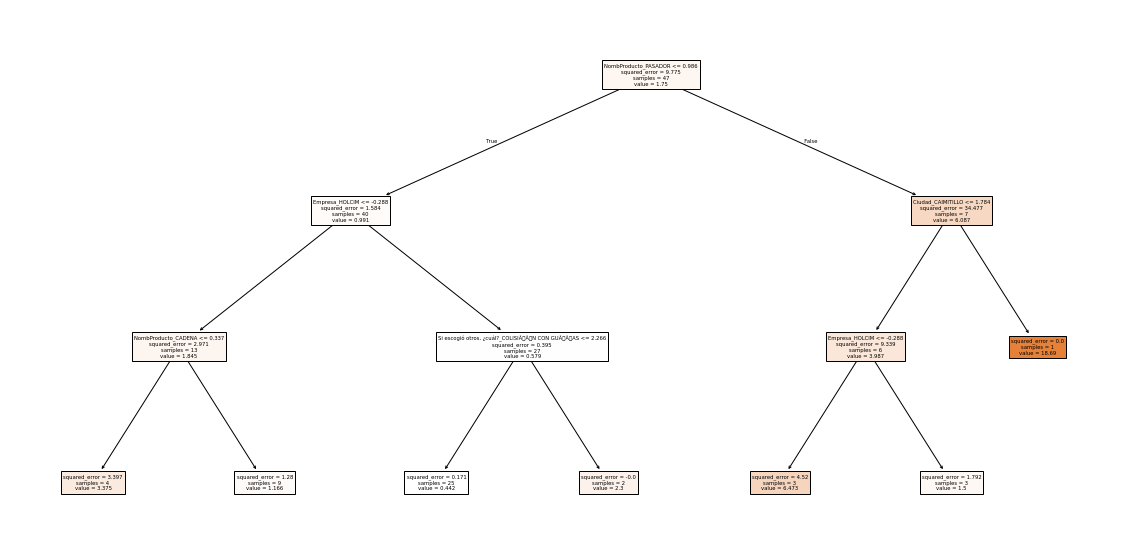

In [123]:
# Crear y entrenar el modelo de árbol de decisión para regresión
rtree = DecisionTreeRegressor(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

Modelos candidatos

In [124]:
# Define los modelos de regresión seleccionados
m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [ m_linreg, m_tree_reg, m_rf_reg, m_gbt_reg]

Selección de variables

In [125]:
# Ahora, utiliza estos modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos_reg, X, y, threshold="2*mean")
X2=X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 31 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Causa de desgaste_DesalineaciÃ³n                                                 47 non-null     float64
 1   Causa de desgaste_No Aplica                                                      47 non-null     float64
 2   Causa de desgaste_Otros                                                          47 non-null     float64
 3   Causa de desgaste_Velocidad incorrecta;DesalineaciÃ³n                            47 non-null     float64
 4   Ciudad_CAIMITILLO                                                                47 non-null     float64
 5   Empresa_ARGOS                                                                    47 non-null     float64
 6   Empresa_CEME

Definir modelo ganador

In [126]:
def medir_modelos(modelos, X, y, cv):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse_scores = -scores  # Convertir puntuaciones negativas a positivas
        resultados[nombre_modelo] = mse_scores.mean()
    return resultados

# Calcular MSE para todos los modelos con todas las variables
mse_scores_all = medir_modelos(modelos_reg, X, y, 30)

# Calcular MSE para todos los modelos con variables seleccionadas
mse_scores_varsel = medir_modelos(modelos_reg, X2, y, 30)

print("MSE para todos los modelos con todas las variables:")
for modelo, mse_score in mse_scores_all.items():
    print(f"{modelo}: {mse_score}")

print("\nMSE para todos los modelos con variables seleccionadas:")
for modelo, mse_score in mse_scores_varsel.items():
    print(f"{modelo}: {mse_score}")

MSE para todos los modelos con todas las variables:
LinearRegression: 4.558239181305036e+28
DecisionTreeRegressor: 15.763994933333338
RandomForestRegressor: 10.58714476646667
GradientBoostingRegressor: 9.76023953137952

MSE para todos los modelos con variables seleccionadas:
LinearRegression: 1.123528669092735e+27
DecisionTreeRegressor: 9.905636600000003
RandomForestRegressor: 10.06109093568
GradientBoostingRegressor: 9.522262961453892


# Interpretación de resultados:

**Comparación entre modelos con todas las variables:**

LinearRegression tiene un MSE extremadamente alto (4.558e+28), lo que indica que el modelo lineal no está capturando bien las relaciones en los datos, probablemente debido a una alta varianza o multicolinealidad entre las variables. Puede ser un signo de que el modelo es ineficaz para estos datos.

DecisionTreeRegressor muestra un MSE de 15.63, lo cual es mucho más bajo que el de la regresión lineal, pero aún podría mejorarse.

RandomForestRegressor y GradientBoostingRegressor tienen MSE más bajos (10.53 y 9.44, respectivamente), lo que sugiere que estos modelos de conjunto (ensemble) funcionan mejor que los árboles de decisión simples o la regresión lineal.

**Comparación entre modelos con variables seleccionadas:**


LinearRegression mejora significativamente al reducirse el MSE a 3.758e+26. Sin embargo, sigue siendo extremadamente alto y sigue sin ser una buena opción.

DecisionTreeRegressor empeora con las variables seleccionadas (18.83 vs 15.63), lo que sugiere que la selección de variables no ayudó a este modelo.

RandomForestRegressor y GradientBoostingRegressor siguen mostrando MSE similares a las pruebas anteriores, pero empeoran levemente con las variables seleccionadas.
